In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize']=[15,8]

In [2]:
plt.rcParams["figure.figsize"]=[15,8]
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

# 1. Read the dataset and view the first 10 rows of it.

In [3]:
df=pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


# 2. Check the shape/dimension of the dataset

In [4]:
df.shape

(5110, 12)

We have 5110 rows and 12 columns.

# 3. Check for the missing values.Display number of missing values per column.

In [5]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

There are 201 missing values in bmi column.
All other column does not have any missing values.

# 4. Investigate and predict the missing BMI Value.


In [6]:
df_missv=df[df['bmi'].isnull()]
df_missv

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [7]:
#Checking the mean of bmi by age
df.groupby(by='age')['bmi'].mean()

age
0.08     15.500000
0.16     14.766667
0.24     17.400000
0.32     18.080000
0.40     15.850000
           ...    
78.00    27.929032
79.00    27.862338
80.00    28.783582
81.00    27.951667
82.00    28.029091
Name: bmi, Length: 104, dtype: float64

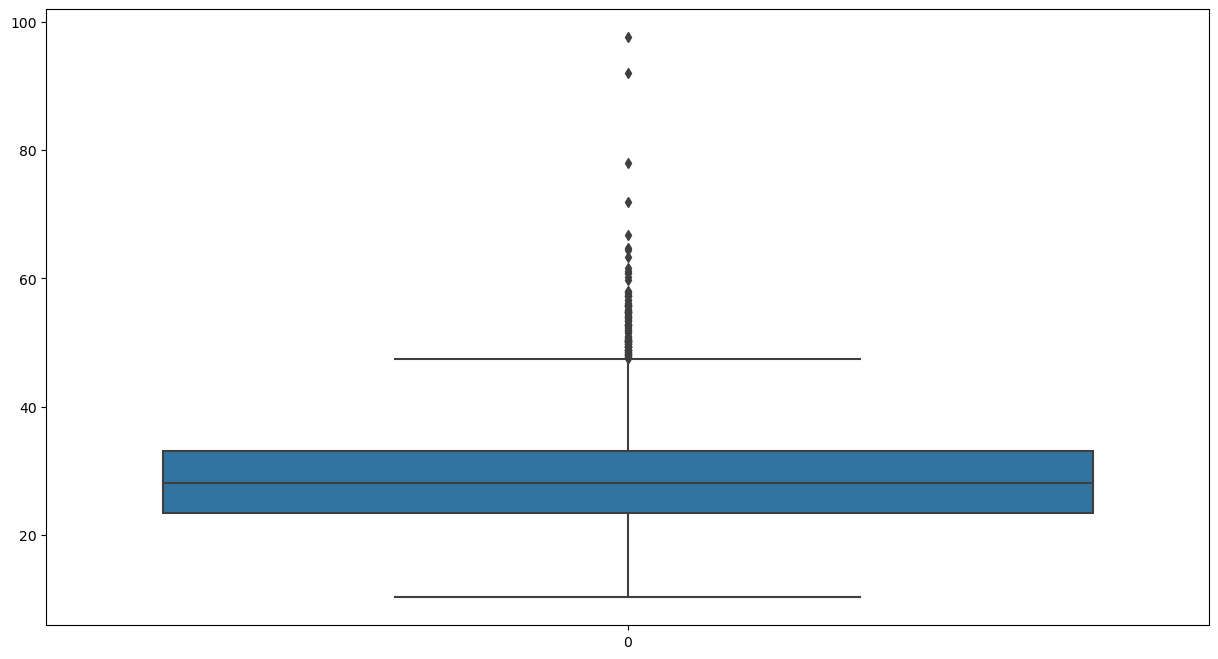

In [8]:
#Boxplot to check for outlier in bmi 
sns.boxplot(data=df['bmi'])
plt.show()

In [9]:
#Checking the median of bmi by age
median_bmi=df.groupby(by='age')['bmi'].median()
median_bmi

age
0.08     15.50
0.16     13.90
0.24     18.50
0.32     17.80
0.40     15.85
         ...  
78.00    27.50
79.00    28.20
80.00    28.70
81.00    27.65
82.00    27.10
Name: bmi, Length: 104, dtype: float64

In [10]:
#As mean is affected by outliers we will use median to impute null values

In [11]:
df['bmi'] = df['bmi'].fillna(df['age'].map(median_bmi))

In [12]:
df['bmi'].isnull().sum()

0

The missing values in the BMI column have been replaced with the median value of the corresponding age group.

# 5. Check the datatype, number of non null values and name of each variable in the dataset.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


The dataset contains 12 column with int,float64 and object datatypes.

It has 5110 non null values for each variable.

# 6. Check the descriptive statistics of the dataset.

In [14]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.881184,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.726308,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.700000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.200000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# 7. Visualize the proportion of Stroke samples in the dataset

In [15]:
sc=df['stroke'].value_counts()
sc

0    4861
1     249
Name: stroke, dtype: int64

In [16]:
sc.index

Int64Index([0, 1], dtype='int64')

In [17]:
sc.values

array([4861,  249], dtype=int64)

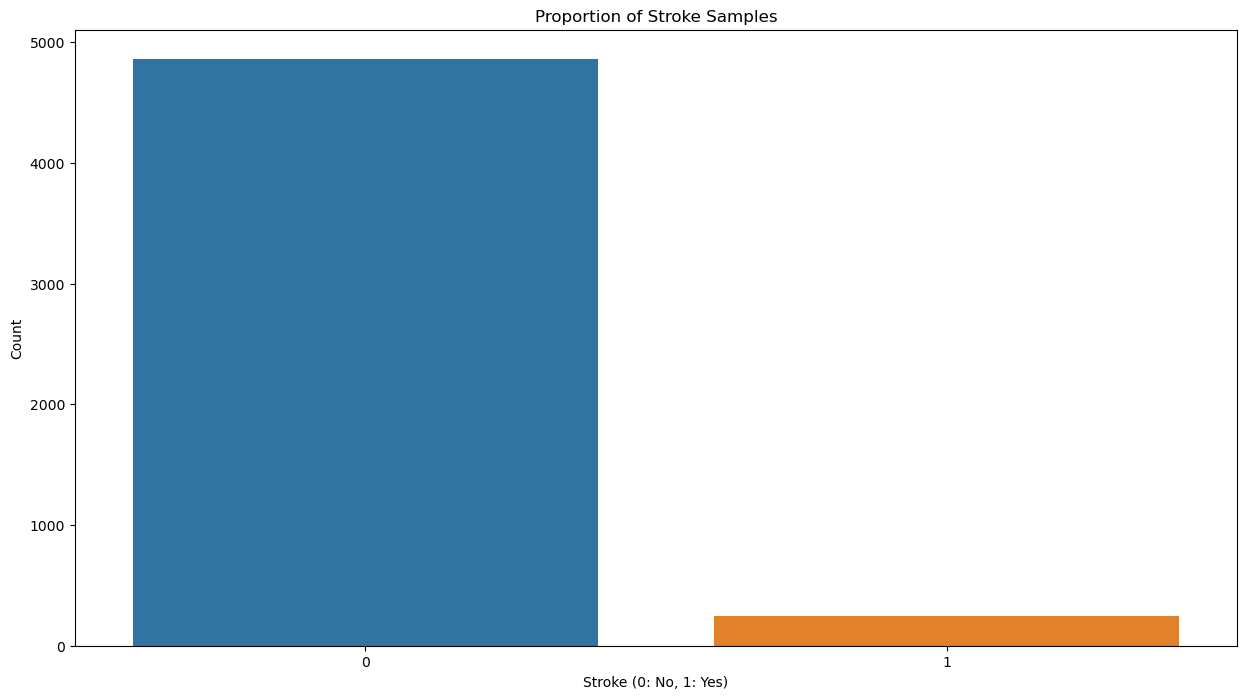

In [18]:
#plt.figure(figsize=(6, 6))
sns.barplot(x=sc.index,y=sc.values)
plt.title('Proportion of Stroke Samples')
plt.xlabel('Stroke (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

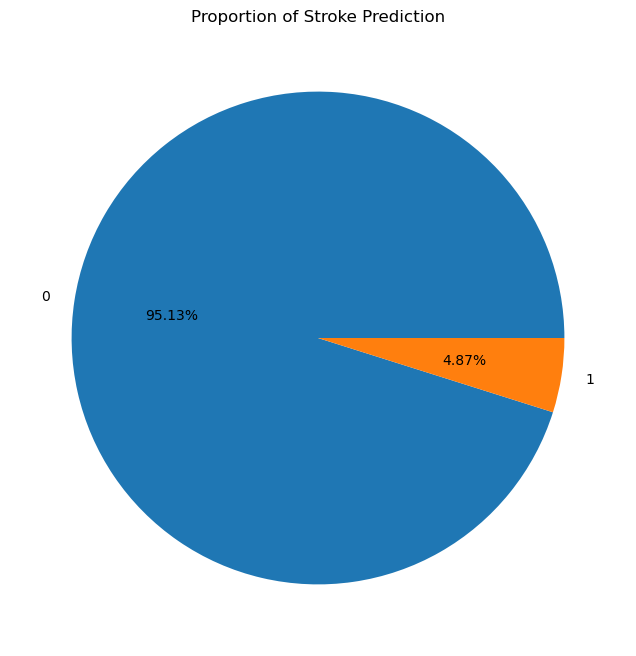

In [19]:
#Pie Chart
plt.pie(sc,labels=sc.index,autopct='%.2f%%')
plt.title('Proportion of Stroke Prediction')
plt.show()

95.13% of all patients are not affected by stroke.


4.87% of all patients are affected by stroke.

# 8. Visualize the Distribution of Male and Female Ages. Write the Observation.

<Axes: xlabel='age', ylabel='Count'>

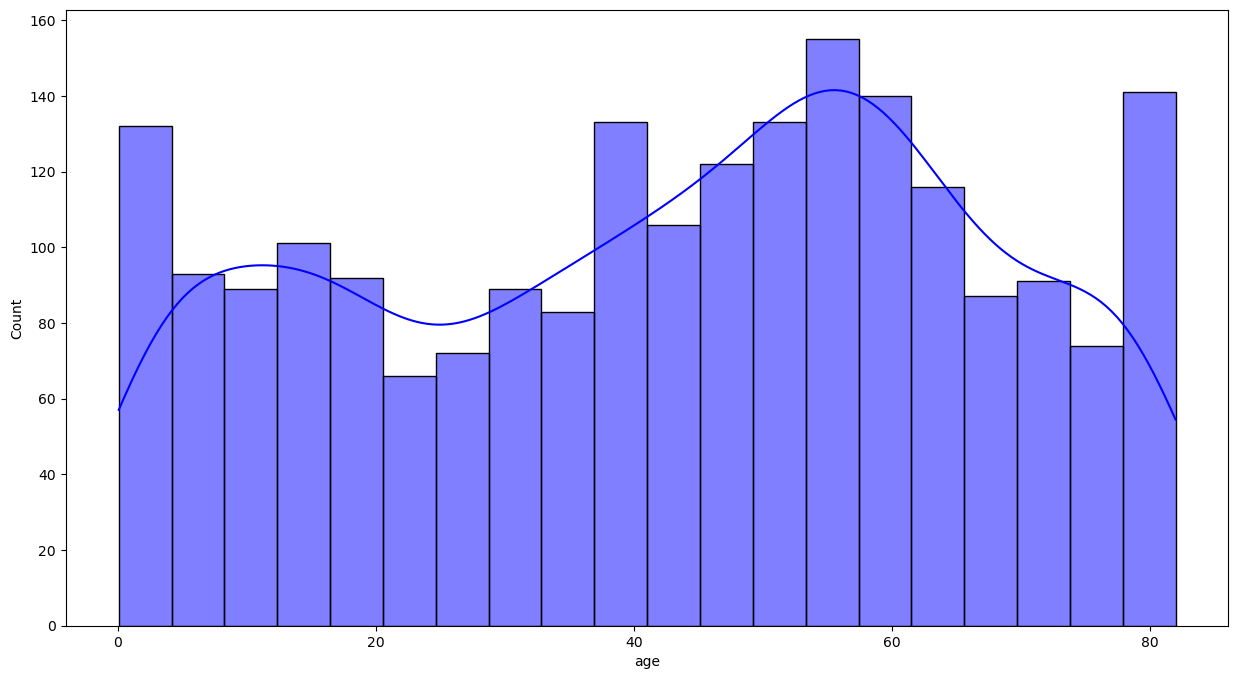

In [20]:
sns.histplot(data=df[df['gender'] == 'Male'], x='age', bins=20, kde=True, label='Male', color='blue')

<Axes: xlabel='age', ylabel='Count'>

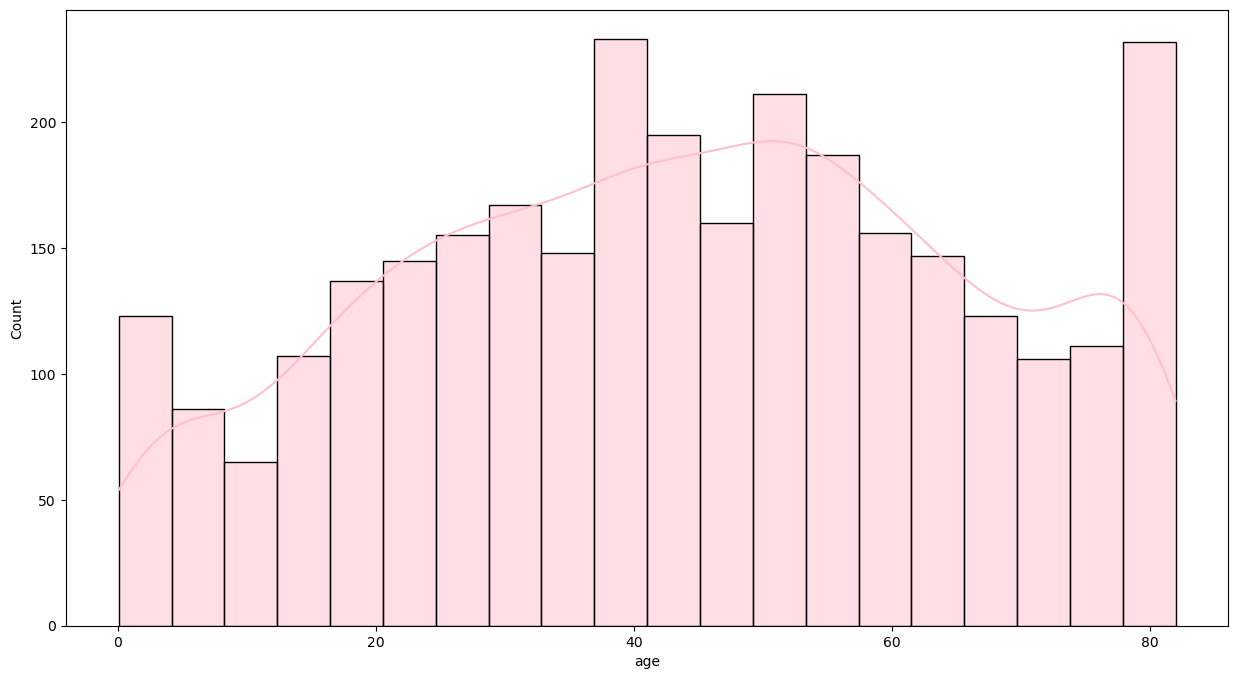

In [21]:
sns.histplot(data=df[df['gender'] == 'Female'], x='age', bins=20, kde=True, label='Female', color='pink')

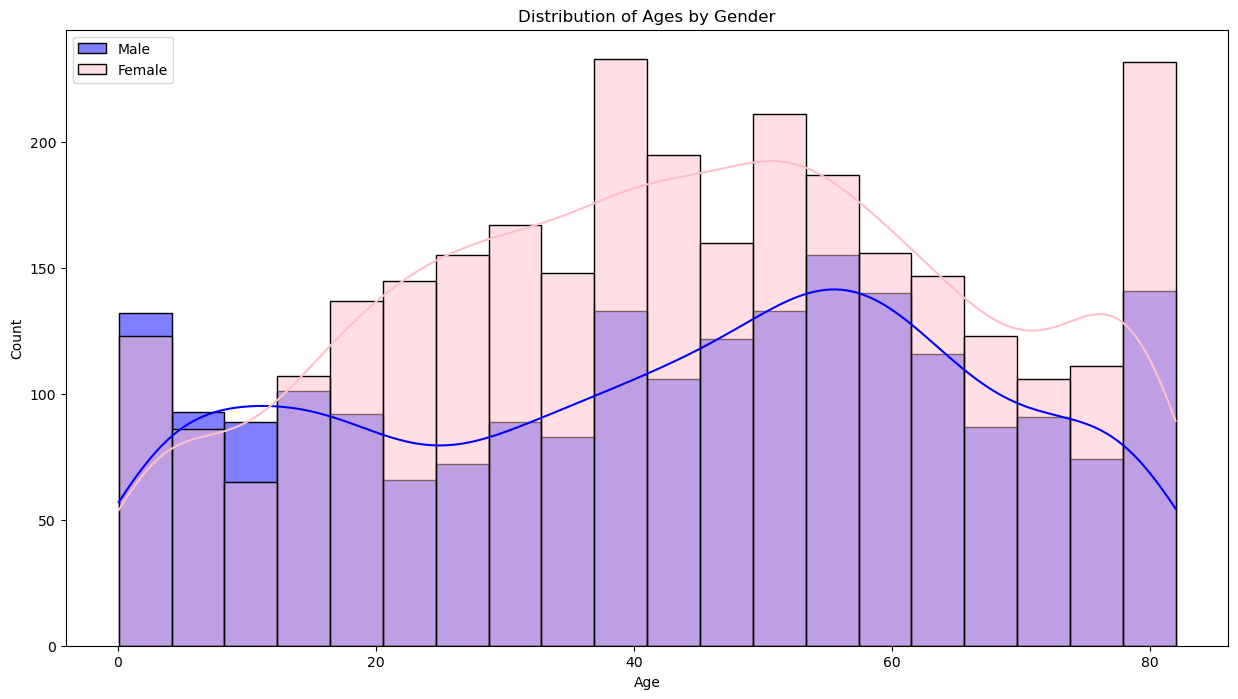

In [22]:

#plt.figure(figsize=(8, 6))
sns.histplot(data=df[df['gender'] == 'Male'], x='age', bins=20, kde=True, label='Male', color='blue')

# Create a histogram for female ages
sns.histplot(data=df[df['gender'] == 'Female'], x='age', bins=20, kde=True, label='Female', color='pink')

plt.title('Distribution of Ages by Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()


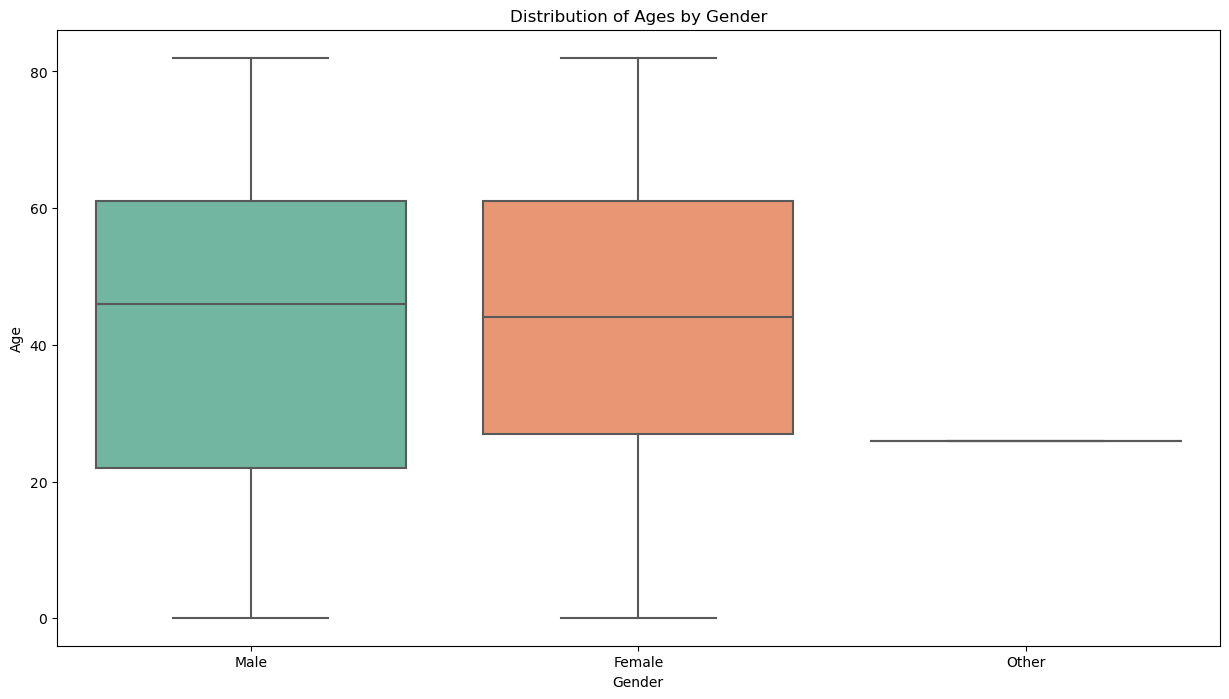

In [23]:
# Create a box plot for male and female ages
#plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='gender', y='age', palette='Set2')
plt.title('Distribution of Ages by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()


In [24]:
df.groupby('gender')['age'].count()

gender
Female    2994
Male      2115
Other        1
Name: age, dtype: int64

# 9.Visualize the stroke sample based on

### a) BMI and Glucose Level

### b) BMI and Age

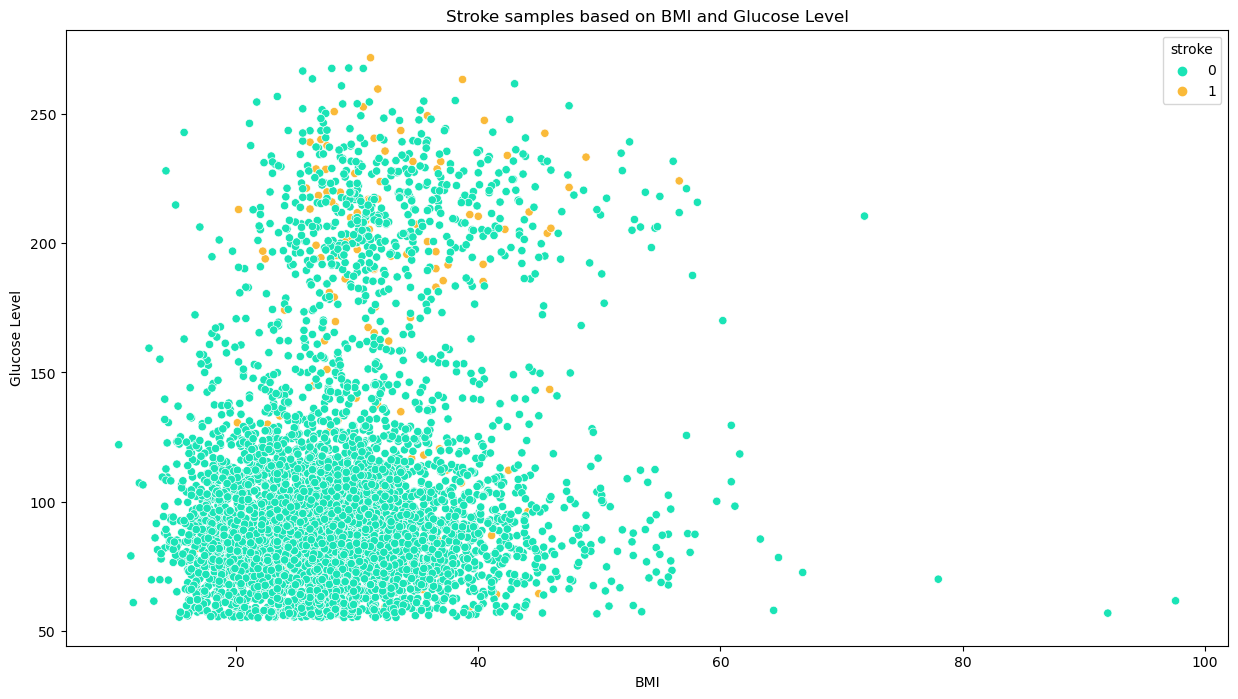

In [25]:
sns.scatterplot(data=df,x='bmi',y='avg_glucose_level',hue='stroke',palette='turbo')
plt.title('Stroke samples based on BMI and Glucose Level')
plt.xlabel('BMI')
plt.ylabel('Glucose Level')
plt.show()

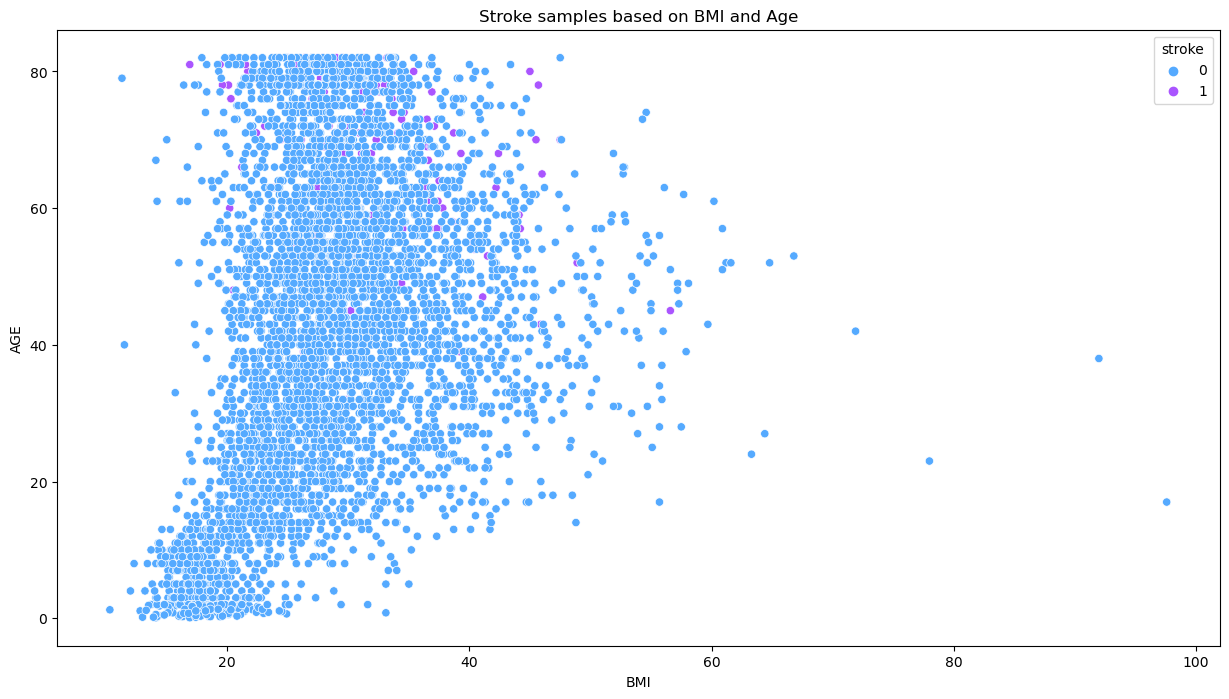

In [26]:
sns.scatterplot(data=df,x='bmi',y='age',hue='stroke',palette='cool')
plt.title('Stroke samples based on BMI and Age')
plt.xlabel('BMI')
plt.ylabel('AGE')
plt.show()

In [27]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.45,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1


# 10. Using the pie chart visualizes the proportion of different smoking categories among the stroke population.

In [28]:
ss=df['smoking_status'].value_counts()
ss

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [29]:
df['smoking_status'].value_counts().index

Index(['never smoked', 'Unknown', 'formerly smoked', 'smokes'], dtype='object')

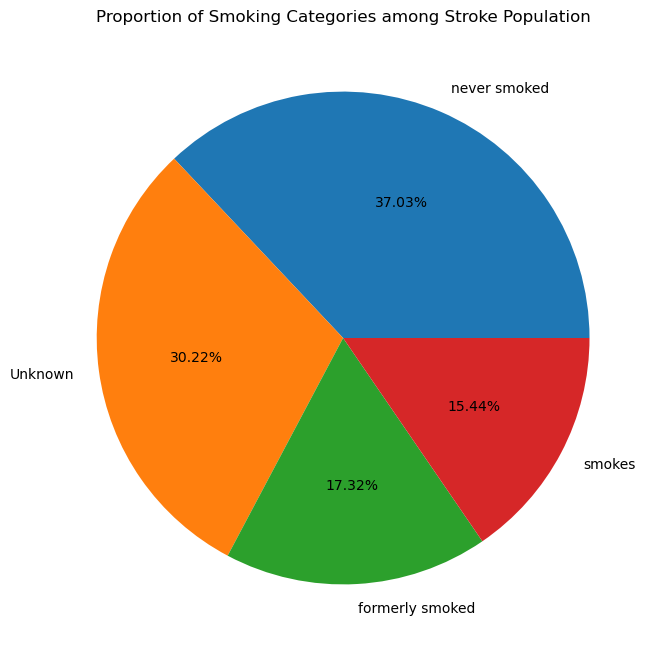

In [30]:
plt.pie(ss,labels=ss.index,autopct='%.2f%%')
plt.title('Proportion of Smoking Categories among Stroke Population')
plt.show()

# 11. Perform hypothesis testing to find the significant variables.

In [31]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.45,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1


Null Hypothesis (H0):None of the independent variable are affecting proportions of the target variable 'stroke.

Alternative Hypothesis (Ha): Atleast one of the independent variable are affecting proportions of the target variable 'stroke.

In [32]:
#As id column does not play any significant role in predicting the stroke outcome so we will drop it.
df1=df.drop(columns='id')
df1.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.45,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1


In [33]:
df2=df1.drop(columns='stroke')
df2.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.45,never smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked


In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [35]:
import scipy.stats as stats


categorical_variables = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
numerical_variables = ['age', 'bmi', 'avg_glucose_level', 'hypertension', 'heart_disease']

# Initialize empty lists and dictionaries to store results
significant_categorical = []
p_values_categorical = {}
significant_numerical = []
p_values_numerical = {}


#p_values<0.05 means variable is significant
# We are performing chi-squared tests for categorical variables
for var in categorical_variables:
    contingency_table = pd.crosstab(df1[var], df1['stroke'])
    chi2, p, _, _ = stats.chi2_contingency(contingency_table)
    
    p_values_categorical[var] = p  # Store p-value
    
    if p < 0.05:  # Set your significance level here
        significant_categorical.append(var)

# Here We are performing t-tests or ANOVA for numerical variables
for var in numerical_variables:
    stroke_group = df1[df1['stroke'] == 1][var]
    no_stroke_group = df1[df1['stroke'] == 0][var]
    
    # Perform t-test
    t_stat, p = stats.ttest_ind(stroke_group, no_stroke_group, equal_var=False)
    
    p_values_numerical[var] = p  # Store p-value
    
    if p < 0.05:  
        significant_numerical.append(var)


print("Significant Categorical Variables:", significant_categorical)
print("P-Values for Categorical Variables:", p_values_categorical)
print("Significant Numerical Variables:", significant_numerical)
print("P-Values for Numerical Variables:", p_values_numerical)


Significant Categorical Variables: ['ever_married', 'work_type', 'smoking_status']
P-Values for Categorical Variables: {'gender': 0.7895490538408245, 'ever_married': 1.6389021142314745e-14, 'work_type': 5.397707801896119e-10, 'Residence_type': 0.29833169286876987, 'smoking_status': 2.0853997025008455e-06}
Significant Numerical Variables: ['age', 'bmi', 'avg_glucose_level', 'hypertension', 'heart_disease']
P-Values for Numerical Variables: {'age': 2.115684848347272e-95, 'bmi': 0.00026458440113256775, 'avg_glucose_level': 2.4014366563697676e-11, 'hypertension': 1.9784813463925777e-09, 'heart_disease': 4.094627208774968e-08}


# 12. Drop the unnecessary columns

As gender,Residence_type does not contribute to stroke based on domain knowledge. So we are dropping it

In [36]:
df1.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [37]:
df1=df1.drop(columns=['gender','Residence_type'])
df1.head()

,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,67.0,0,1,Yes,Private,228.69,36.60,formerly smoked,1
1,61.0,0,0,Yes,Self-employed,202.21,29.45,never smoked,1
2,80.0,0,1,Yes,Private,105.92,32.50,never smoked,1
3,49.0,0,0,Yes,Private,171.23,34.40,smokes,1
4,79.0,1,0,Yes,Self-employed,174.12,24.00,never smoked,1


# 13. Write the code to replace following categories columns in integer format as follow –

### a) work_type('Private':0,'Selfemployed':1,'Govt_job':2,'children':1,'Never_worked':-2)


In [38]:
df1['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [39]:
df1['work_type'] = df1['work_type'].replace({'Private':0,'Self-employed':1,'Govt_job':2,'children':-1,'Never_worked':-2})

In [40]:
df1.head()

,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,67.0,0,1,Yes,0,228.69,36.60,formerly smoked,1
1,61.0,0,0,Yes,1,202.21,29.45,never smoked,1
2,80.0,0,1,Yes,0,105.92,32.50,never smoked,1
3,49.0,0,0,Yes,0,171.23,34.40,smokes,1
4,79.0,1,0,Yes,1,174.12,24.00,never smoked,1


### b) ever_married('Yes': 1, 'No': 0)

In [41]:
df1['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [42]:
df1['ever_married']=df['ever_married'].replace({'Yes':1,'No':0})

In [43]:
df1['ever_married'].head()

0    1
1    1
2    1
3    1
4    1
Name: ever_married, dtype: int64

In [44]:
df1.head()

,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,67.0,0,1,1,0,228.69,36.60,formerly smoked,1
1,61.0,0,0,1,1,202.21,29.45,never smoked,1
2,80.0,0,1,1,0,105.92,32.50,never smoked,1
3,49.0,0,0,1,0,171.23,34.40,smokes,1
4,79.0,1,0,1,1,174.12,24.00,never smoked,1


### c) smoking_status('never smoked':0,'Unknown':1,'formerly smoked':2,'smokes':-1)

In [45]:
df1['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [46]:
df1['smoking_status']=df1['smoking_status'].replace({'never smoked':0,'Unknown':1,'formerly smoked':2,'smokes':-1})

In [47]:
df1.head()

,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,67.0,0,1,1,0,228.69,36.60,2,1
1,61.0,0,0,1,1,202.21,29.45,0,1
2,80.0,0,1,1,0,105.92,32.50,0,1
3,49.0,0,0,1,0,171.23,34.40,-1,1
4,79.0,1,0,1,1,174.12,24.00,0,1


# 14. Check the distribution of 'bmi' and 'stroke' columns in the dataset.

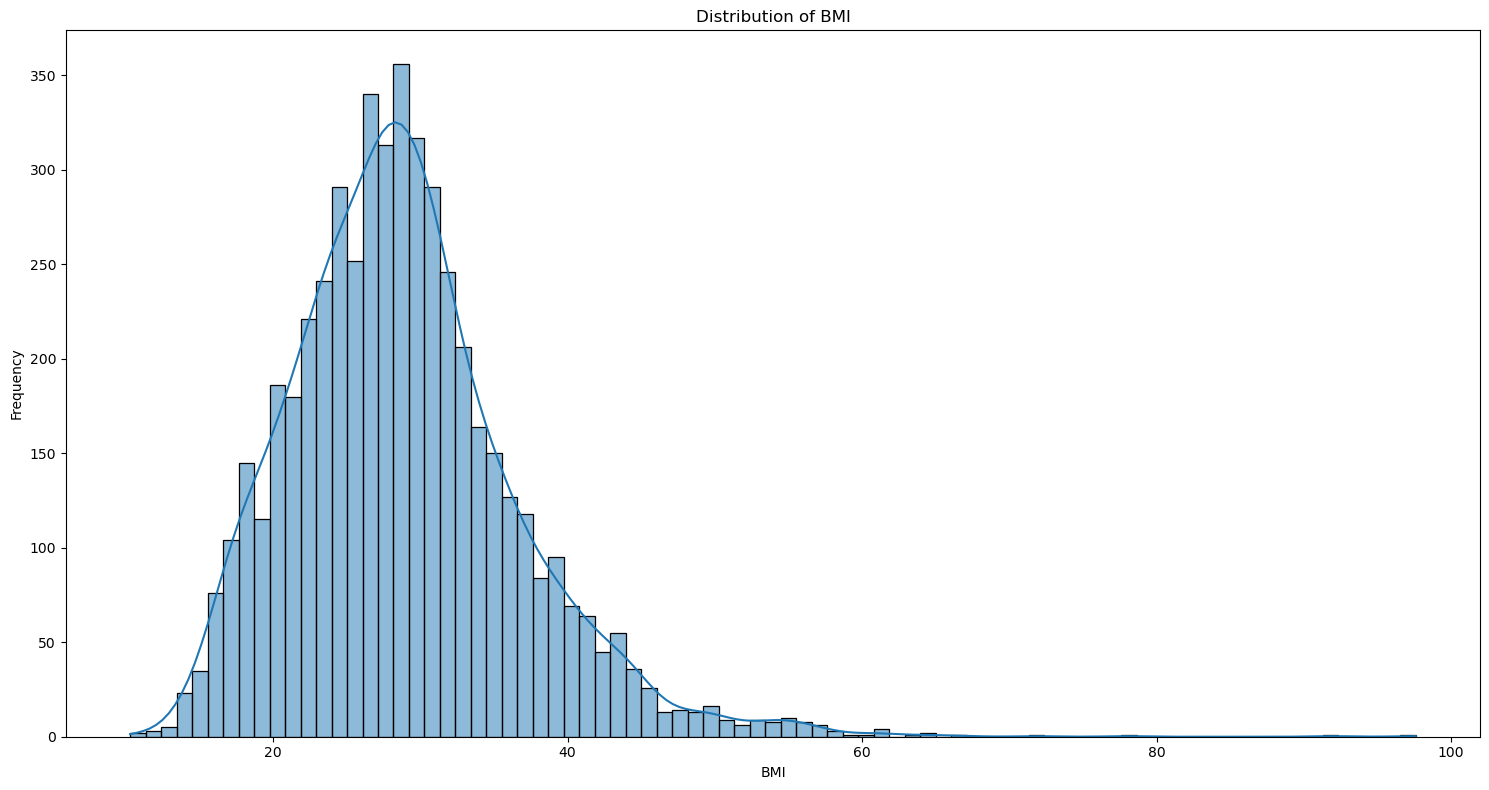

In [48]:
sns.histplot(data=df['bmi'],kde=True)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

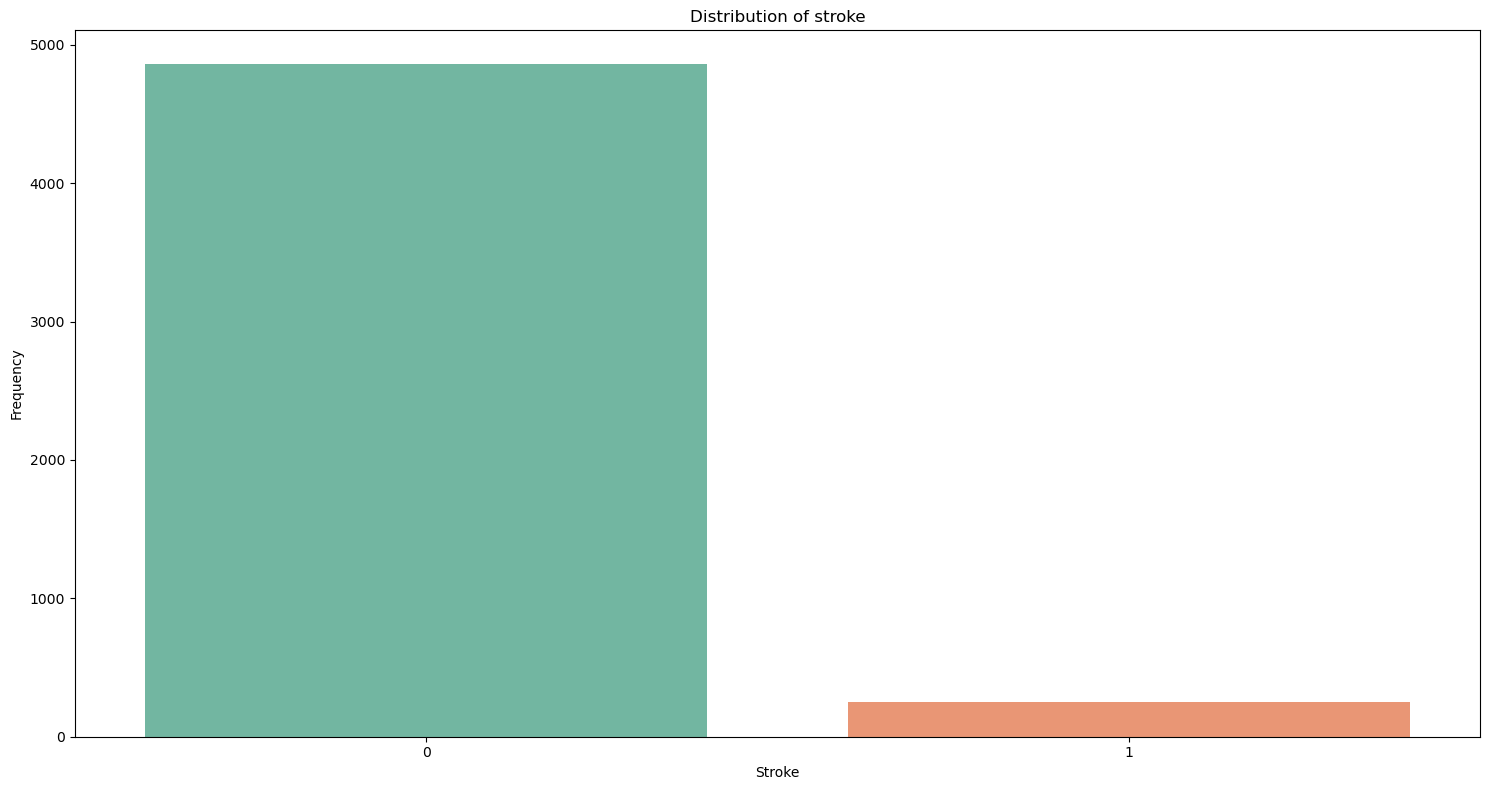

In [49]:
sns.countplot(data=df1,x='stroke',palette='Set2')
plt.title('Distribution of stroke')
plt.xlabel('Stroke')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


# 15. List down columns that are highly skewed.

In [50]:
df1.skew()

age                 -0.137059
hypertension         2.715392
heart_disease        3.947244
ever_married        -0.657745
work_type            0.585971
avg_glucose_level    1.572284
bmi                  1.061784
smoking_status       0.082279
stroke               4.193284
dtype: float64

Columns like hypertension,heart_disease and stroke are highly skewed.

# 16. List down the columns that are highly kurtosis.

In [51]:
df1.kurtosis()

age                  -0.991010
hypertension          5.375456
heart_disease        13.586052
ever_married         -1.567985
work_type            -0.059562
avg_glucose_level     1.680479
bmi                   3.544386
smoking_status       -0.922415
stroke               15.589736
dtype: float64

Columns like hypertension,heart_disease,bmi and stroke are leptokurtic in nature.

# 17. Find the distribution of all variables with respect to the outcome 'stroke' variable.

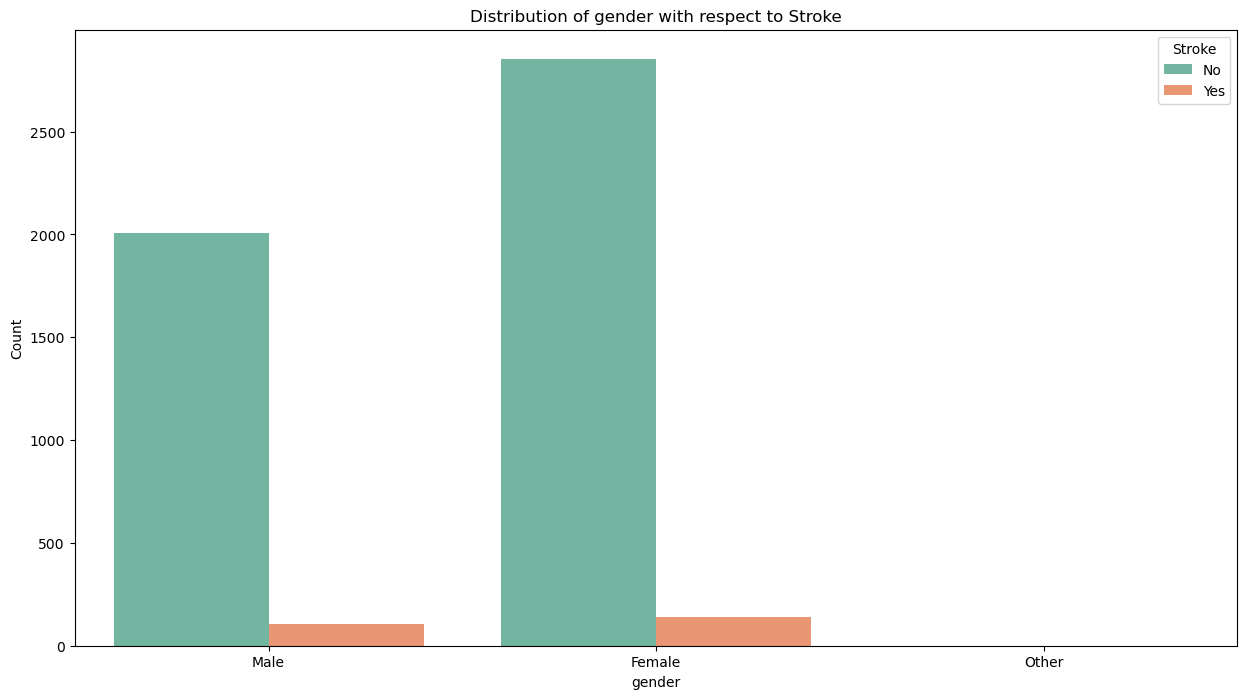

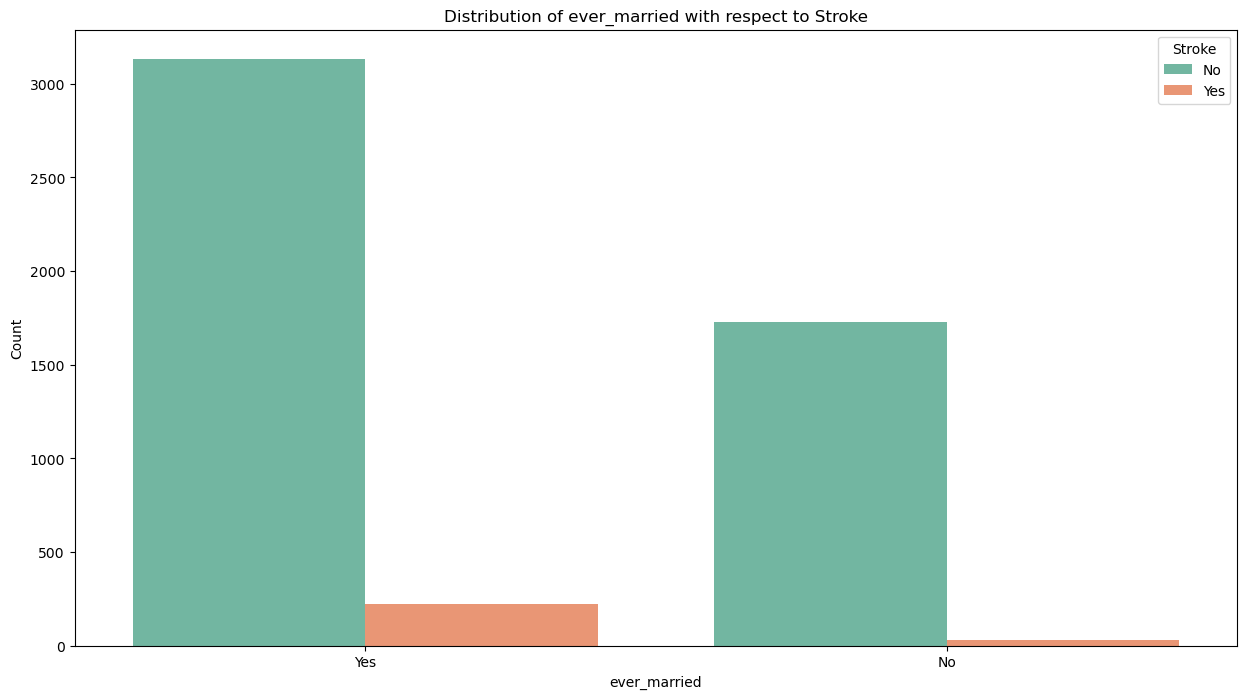

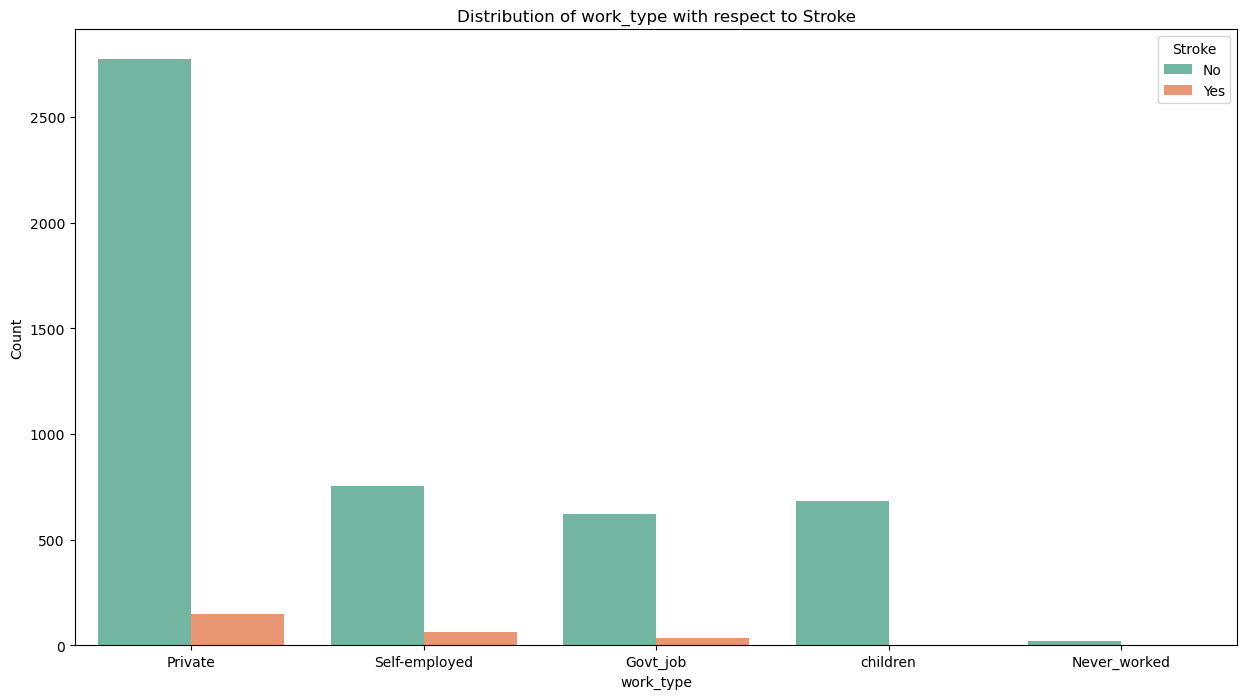

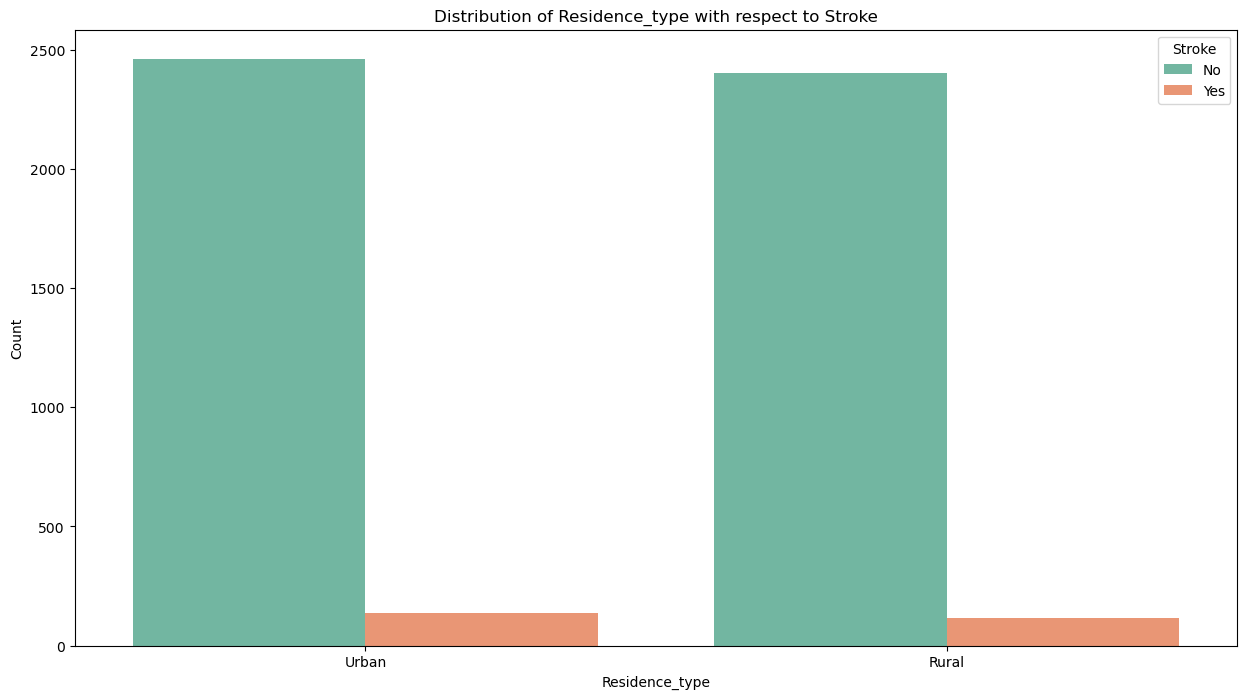

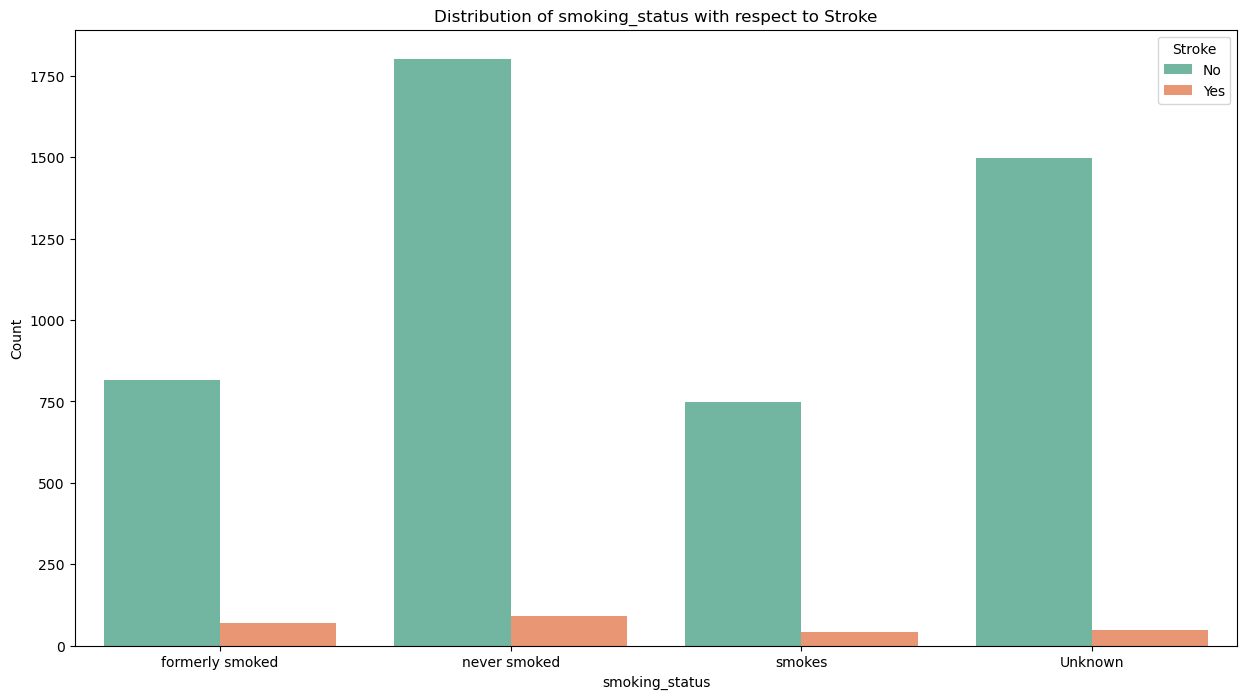

In [52]:
# Create subplots for each categorical variable
for i in df.select_dtypes(include=['object']):
    sns.countplot(data=df, x=i, hue='stroke', palette='Set2')
    plt.title(f'Distribution of {i} with respect to Stroke')
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.legend(title='Stroke', labels=['No', 'Yes'])
    plt.show()


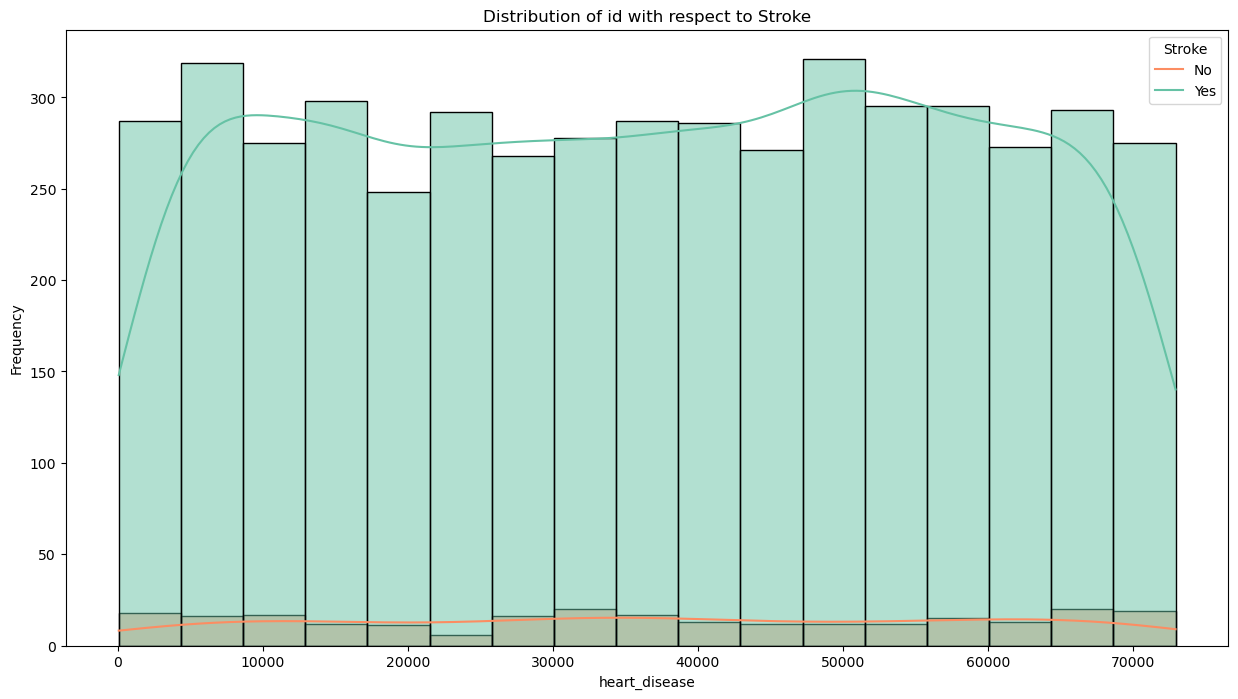

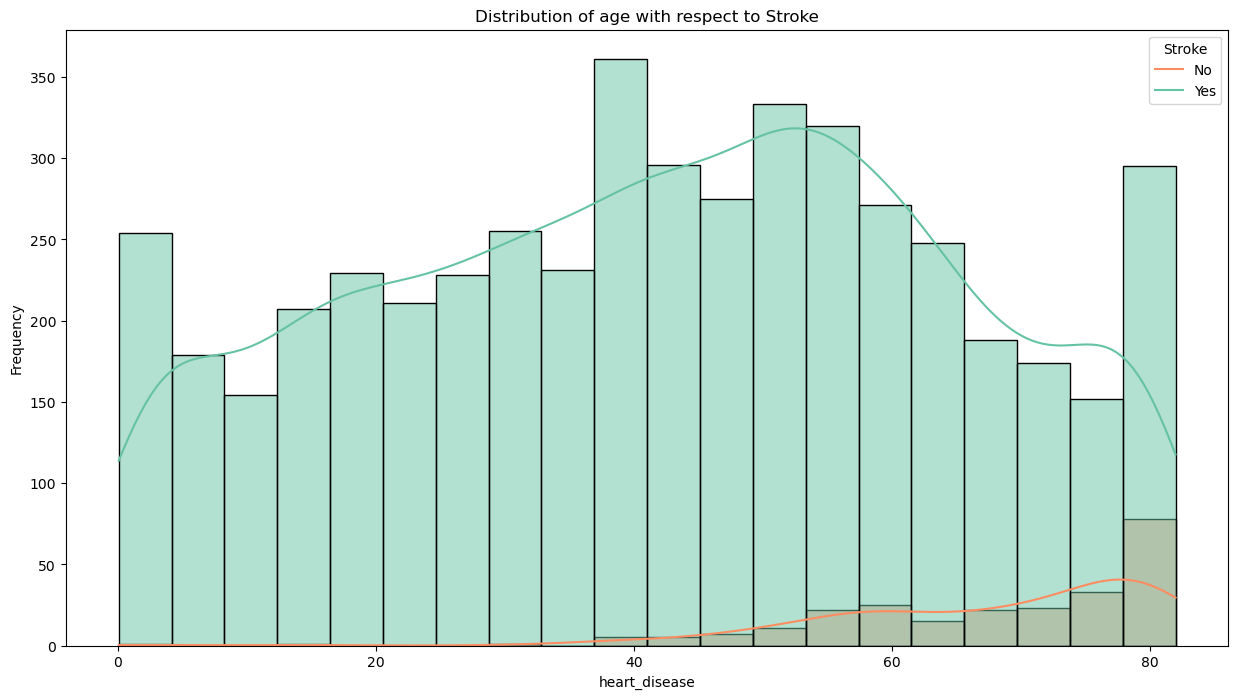

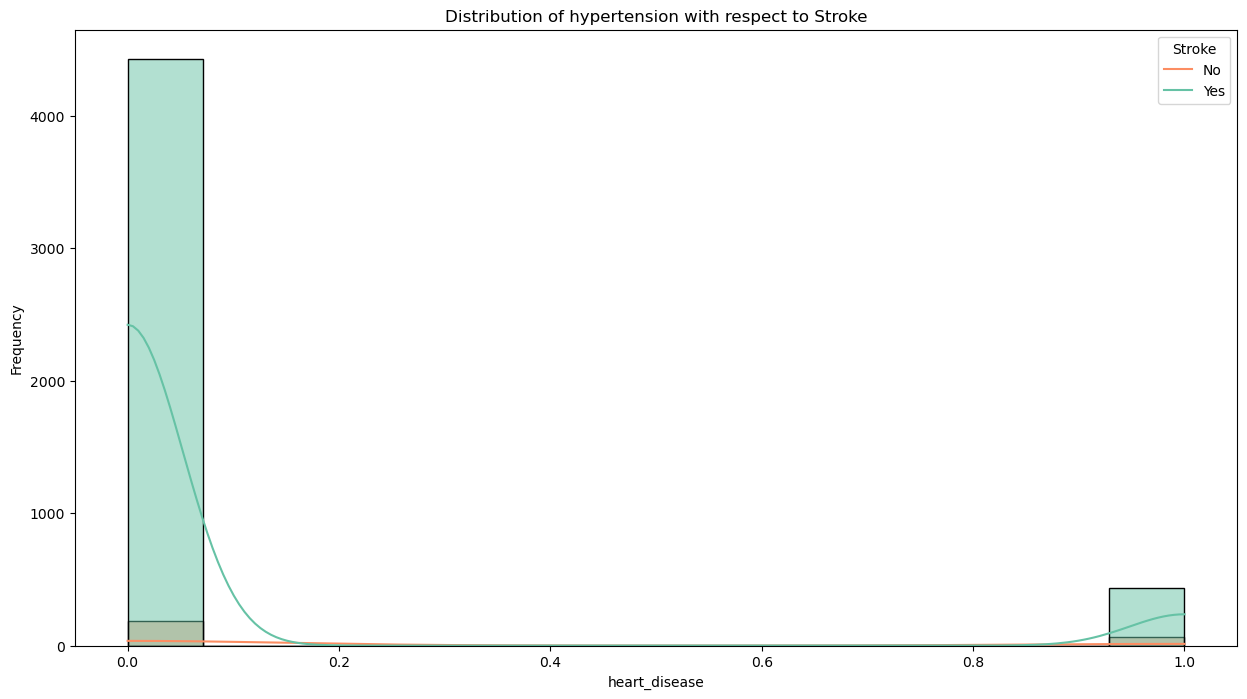

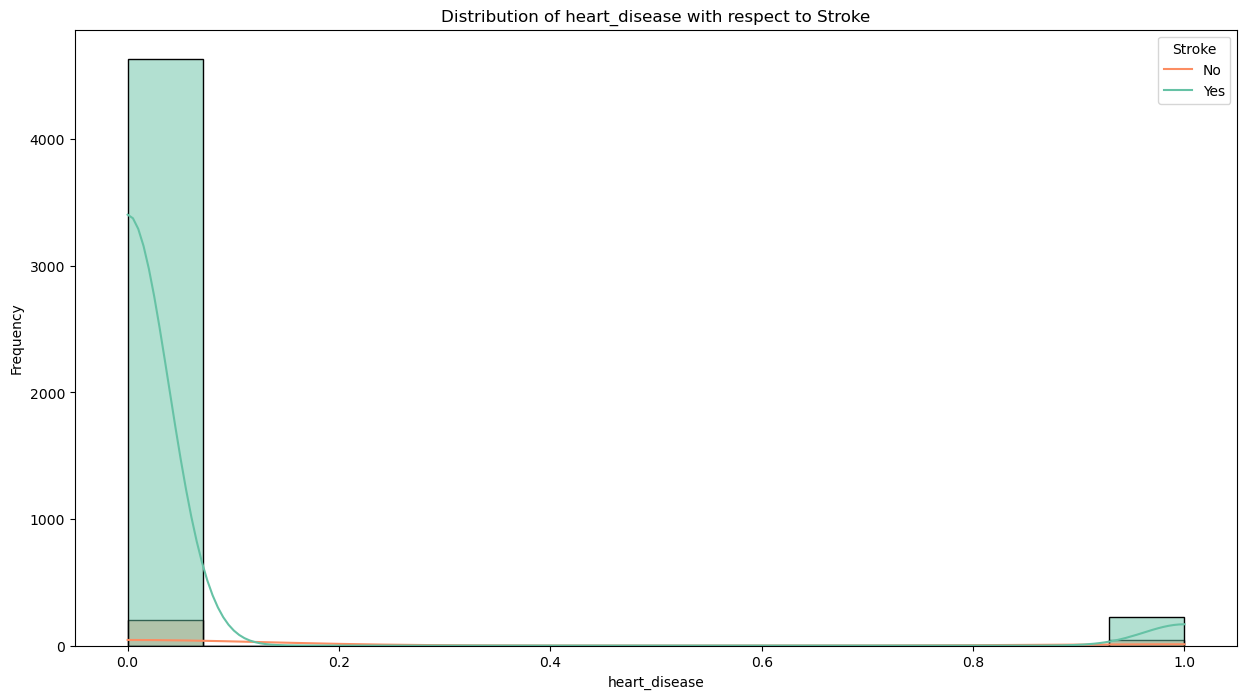

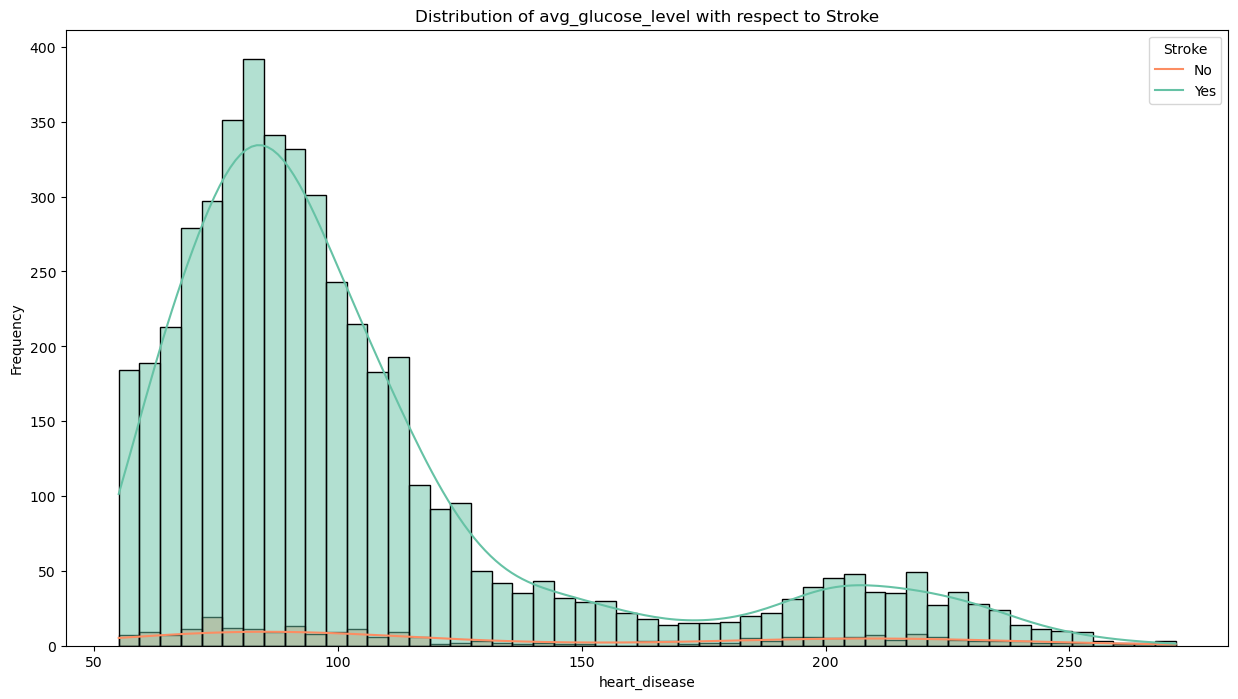

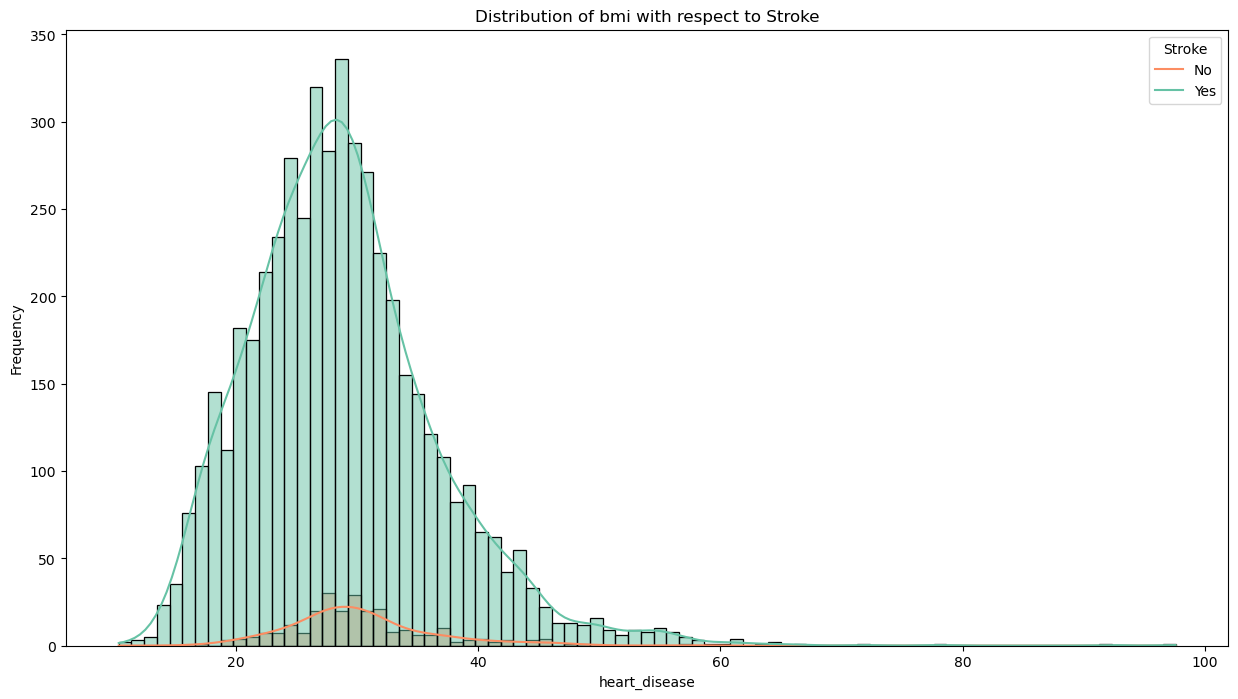

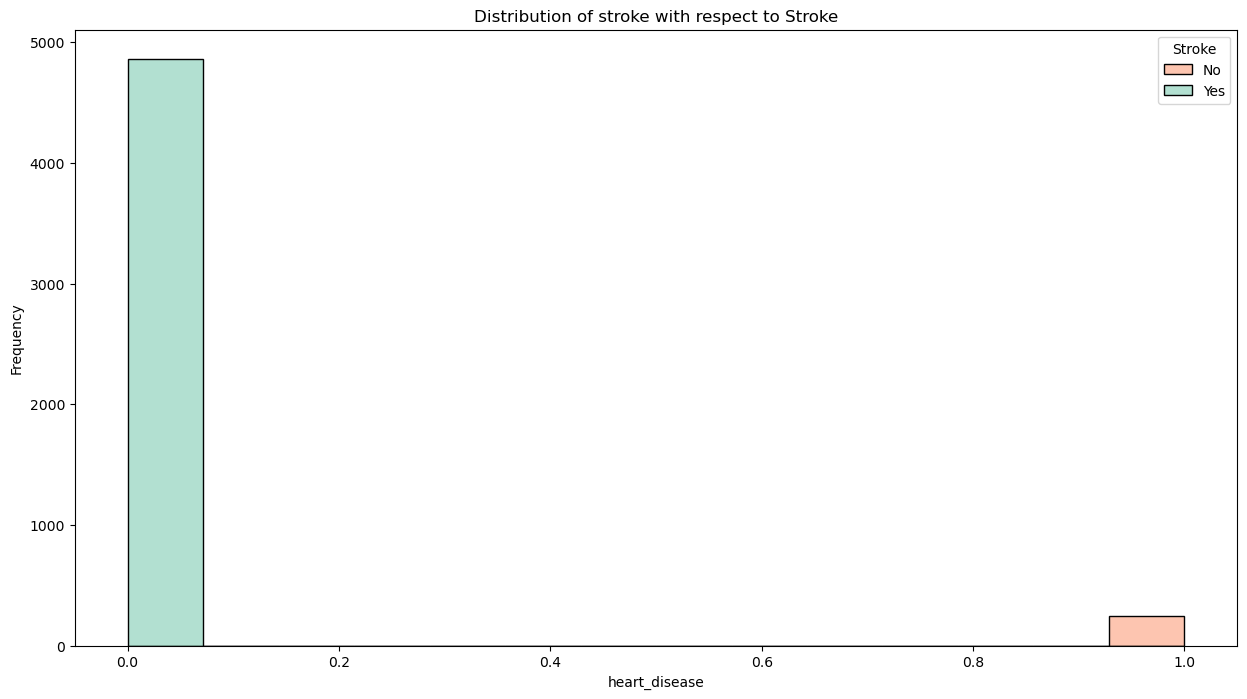

In [53]:
# Numerical variables to visualize

# Create subplots for each numerical variable
for i in df.select_dtypes(include=np.number):
    sns.histplot(data=df, x=i, hue='stroke', kde=True, palette='Set2')
    plt.title(f'Distribution of {i} with respect to Stroke')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.legend(title='Stroke', labels=['No', 'Yes'])
    plt.show()


# 18. Plot the heatmap for correlation matrix for the given dataset. Write the observation.

<Axes: >

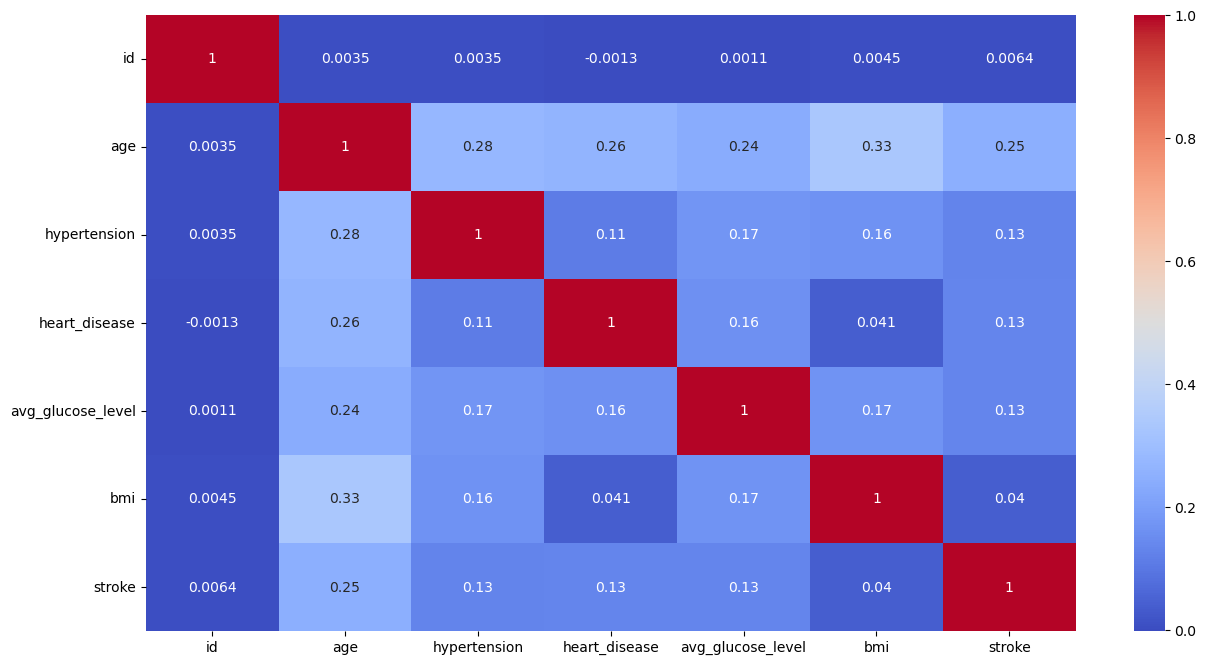

In [54]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

None of the variable are highly correlated.

# 19. Split the dataset randomly into train and test dataset. Use a train ratio of 70:30 ratio.

In [55]:
df_num=df.select_dtypes(include=np.number)
df_num.columns

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke'],
      dtype='object')

In [56]:
X=df[['age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke']]
y=df['stroke']

In [57]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_sc=pd.DataFrame(sc.fit_transform(X), columns = X.columns)

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.3, random_state=42)

In [59]:
print('X_train',X_train.shape)
print('X_test',X_train.shape)
print('y_train',X_train.shape)
print('y_test',X_train.shape)

X_train (3577, 6)
X_test (3577, 6)
y_train (3577, 6)
y_test (3577, 6)


In [60]:
X_train.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
3897,-1.734890,-0.328602,-0.238947,-0.347349,-1.641460,-0.226327
576,-0.629206,-0.328602,-0.238947,2.240156,-0.787152,-0.226327
4013,0.034205,3.043196,-0.238947,-0.328356,-0.308222,-0.226327
4536,1.095662,3.043196,-0.238947,0.984832,1.478058,-0.226327
1180,0.830297,-0.328602,-0.238947,-0.520718,0.921464,-0.226327


In [61]:
X_test.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
4688,-0.540751,-0.328602,-0.238947,-0.912069,-0.761264,-0.226327
4478,-0.142705,-0.328602,-0.238947,-0.902351,-0.075229,-0.226327
3849,-1.557980,-0.328602,-0.238947,-0.700713,-0.825984,-0.226327
4355,1.582163,3.043196,-0.238947,-0.651684,-1.214306,-0.226327
3826,1.405253,-0.328602,-0.238947,-0.251279,-0.217613,-0.226327


# 20. Check the dataset is balanced or imbalanced. If it is highly investigated, a different approach to balanced the dataset by using the correct technique.

In [62]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [63]:
df['stroke'].value_counts(normalize=True)*100

0    95.127202
1     4.872798
Name: stroke, dtype: float64

Our data is highly imbalanced

SMOTE resampling techniques, requires that all features be numeric so we are using df1 which has encoded variables.

In [64]:
from imblearn.over_sampling import SMOTE


In [65]:
X_bal=df1.drop('stroke',axis=1)
y_bal=df1['stroke']

smote = SMOTE()

# Apply SMOTE to balance the data
X_balanced, y_balanced = smote.fit_resample(X_bal,y_bal)

# Check the class distribution after balancing
print(y_balanced.value_counts())


1    4861
0    4861
Name: stroke, dtype: int64


# 21. Model Selection/hyperparameter tuning

### - Try different models and fine tune their performance until you get the desired level of performance on the given dataset.

### Model Evaluation - Evaluate the models using appropriate evaluation metrics

# Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [67]:
#Step 1-Separate X and y -Already done in form of X_bal and y_bal
#Step 2-Splitting the data in train and test
X_train, X_test, y_train, y_test = train_test_split(X_balanced,y_balanced, test_size=0.3, random_state=42)

In [68]:
#Step 3-Call the model
lr=LogisticRegression()
#Step 4-Fit the model
model=lr.fit(X_train,y_train)
#Step 5-Predict using the model
pred_test=lr.predict(X_test)

In [69]:
#Step 6-Evaluation Matrix
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.80      0.77      0.78      1457
           1       0.78      0.81      0.79      1460

    accuracy                           0.79      2917
   macro avg       0.79      0.79      0.79      2917
weighted avg       0.79      0.79      0.79      2917



In [70]:
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# DECISION TREE

In [71]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=10)
dt_params={'max_depth':np.arange(0,20),'min_samples_leaf':np.arange(2,10)}
from sklearn.model_selection import KFold
kf=KFold(n_splits=5,shuffle=True,random_state=10)

In [72]:
from sklearn.model_selection import GridSearchCV
dt_1=GridSearchCV(dt,dt_params,cv=kf,scoring='r2')
dt_1.fit(X_train,y_train)
dt_1.best_params_

{'max_depth': 19, 'min_samples_leaf': 2}

In [73]:
dt_tuned=DecisionTreeClassifier(max_depth=6,min_samples_leaf=2)
dt_tuned.fit(X_train,y_train)
pred_test=dt_tuned.predict(X_test)
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82      1457
           1       0.80      0.87      0.83      1460

    accuracy                           0.83      2917
   macro avg       0.83      0.83      0.83      2917
weighted avg       0.83      0.83      0.83      2917



# RANDOM FOREST

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
rf=RandomForestClassifier(random_state=10)
rf_params={'n_estimators':np.arange(1,20)}
kf=KFold(n_splits=5,shuffle=True,random_state=10)
gs=GridSearchCV(rf,rf_params,cv=kf,scoring='r2')
gs.fit(X_train,y_train)
gs.best_params_

{'n_estimators': 16}

In [75]:
rf_tuned=RandomForestClassifier(n_estimators=18)
rf_tuned.fit(X_train,y_train)
pred_test=rf_tuned.predict(X_test)
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1457
           1       0.93      0.94      0.93      1460

    accuracy                           0.93      2917
   macro avg       0.93      0.93      0.93      2917
weighted avg       0.93      0.93      0.93      2917



Random Forest is giving us 93% accuracy.